## STOP AND NON-STOP TRAFFIC SIGN DETECTION FOR SELF DRIVING CARS~~ 

This Project is to build a system for self driving cars to detect stop and non-stop traffic signs when selfdriving.The model was trained using Deep Learning(Convolutional Neural Network)

**Data Source:**  
   + IBM Data Science SKills Acquisition Program

**Data credit:**  
  + IBM
  
**The Steps in this project include:**  
 - Import dependencies
 - Create Labels for images
 - Image Processing
 - Split Data
 - Train and test Convolutional Neural Network
 - Build a predictive system

**IMPORTING DEPENDENCIES**

In [1]:
import os
import cv2
import pickle
import numpy as np 
from PIL import Image
import tensorflow as tf 
from tensorflow import keras 
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
# Extracting the images from each file directory 

stop_data = os.listdir("C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop")
not_stop_data = os.listdir("C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop")


In [3]:
stop_data[:5]

['1.jpg', '10.jpg', '100.jpg', '11.jpg', '12.jpeg']

In [4]:
not_stop_data[:5]

['101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg']

In [5]:
print("The total number of images in the dataset:{}".format(len(stop_data)+(len(not_stop_data))))
print("The total number of stop images:{}".format(len(stop_data)))
print("The total number of not-stop images:{}".format(len(not_stop_data)))

The total number of images in the dataset:197
The total number of stop images:97
The total number of not-stop images:100


**CREATING LABELS FOR THE IMAGES**

   - Stop Sign ==> 1  
   
   
   - Not Stop ==> 0

In [6]:
# Multiplying the assigned label value to each image 

stop = [1]*len(stop_data)
not_stop = [0]*len(not_stop_data)

In [7]:
# Joining the labels together to tally with the target images 

labels = stop + not_stop

print("The total number of label assigned to the images:{}".format(len(labels)))
print("The fisrt 5 labels:{}".format(labels[:5]))
print("The fisrt 5 labels:{}".format(labels[-5:]))

The total number of label assigned to the images:197
The fisrt 5 labels:[1, 1, 1, 1, 1]
The fisrt 5 labels:[0, 0, 0, 0, 0]


**IMAGE PREPROCESSING**

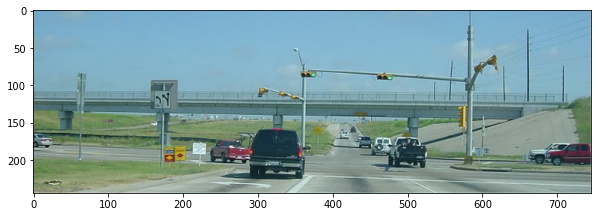

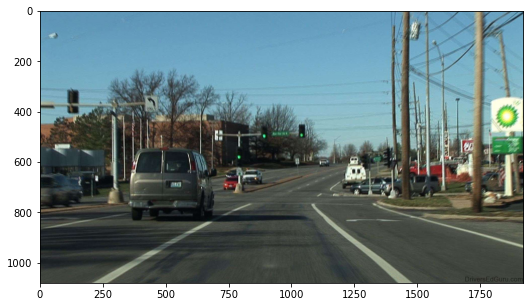

In [8]:
#Viewing some of the Not-stop images 

plt.figure(figsize=(10,5))
image = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//104.jpg"
img = mpimg.imread(image)
plt.imshow(img)
plt.show()

plt.figure(figsize=(10,5))
image = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//102.jpg"
img = mpimg.imread(image)
plt.imshow(img)
plt.show()


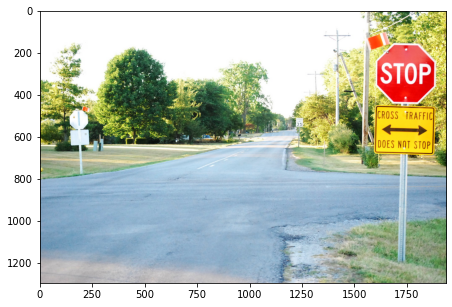

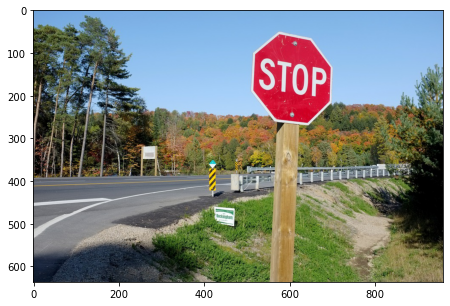

In [9]:
#Viewing some of the images with Stop sign  

plt.figure(figsize=(10,5))
image = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop//20.jpg"
img = mpimg.imread(image)
plt.imshow(img)
plt.show()

plt.figure(figsize=(10,5))
image = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop//30.jpg"
img = mpimg.imread(image)
plt.imshow(img)
plt.show()

In [10]:
stop_path = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop//"
not_stop_path = "C://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//"


# Creating an empty list for the converted images  
stop_sign = []

# iterating through the images in the stop sign file 
for stop_image in stop_data:
    # concatinating / merging each iteration and the path above 
    image = Image.open(stop_path + stop_image)
    # Resizing the image to (128 by 128) size
    image = image.resize((128,128))
     # Converting the image to a RED,GREEn,BlUE Color 
    image = image.convert("RGB")
    # Converting the image into a numpy array 
    image = np.array(image)
    # Appending the result to a variable name "stop-sign"
    stop_sign.append(image)

In [11]:
print(stop_sign[0])

[[[219 228 243]
  [222 231 245]
  [225 235 247]
  ...
  [161 175 203]
  [160 175 202]
  [160 176 202]]

 [[223 234 248]
  [224 234 249]
  [224 234 246]
  ...
  [165 176 201]
  [166 176 200]
  [170 181 203]]

 [[221 235 248]
  [220 232 245]
  [219 229 242]
  ...
  [170 178 201]
  [173 180 203]
  [178 185 204]]

 ...

 [[ 88  73  59]
  [ 69  65  60]
  [ 74  67  65]
  ...
  [ 49  33  22]
  [ 48  35  23]
  [ 54  42  31]]

 [[105  87  69]
  [102  95  90]
  [101  92  88]
  ...
  [ 43  29  18]
  [ 40  26  17]
  [ 48  35  26]]

 [[115  95  77]
  [116 106 100]
  [119 107 102]
  ...
  [ 38  24  14]
  [ 37  23  14]
  [ 37  24  15]]]


In [12]:
# Creating an empty list for the converted images  
not_stop_sign = []

# iterating through the images in the Not-stop sign file 
for not_stop_image in not_stop_data:
    # concatinating / merging each iteration and the path above 
    image = Image.open(not_stop_path + not_stop_image)
    # Resizing the image to (128 by 128) size
    image = image.resize((128,128))
    # Converting the image to a RED,GREEn,BlUE Color 
    image = image.convert("RGB")
    # Converting the image into a numpy array 
    image = np.array(image)
    # Appending the result to a variable name "stop-sign"
    not_stop_sign.append(image)

In [13]:
not_stop_sign[0]

array([[[ 80, 134, 168],
        [ 80, 134, 168],
        [ 79, 133, 167],
        ...,
        [ 89, 148, 178],
        [ 87, 142, 173],
        [ 84, 135, 167]],

       [[ 81, 135, 169],
        [ 80, 134, 168],
        [ 79, 133, 167],
        ...,
        [ 91, 148, 179],
        [ 84, 135, 168],
        [ 90, 146, 182]],

       [[ 81, 135, 169],
        [ 80, 134, 168],
        [ 80, 134, 168],
        ...,
        [ 86, 140, 170],
        [ 88, 142, 174],
        [ 92, 149, 181]],

       ...,

       [[ 61,  65,  59],
        [ 64,  66,  60],
        [ 63,  67,  60],
        ...,
        [ 64,  66,  56],
        [ 66,  68,  61],
        [ 67,  73,  61]],

       [[ 61,  66,  59],
        [ 64,  66,  59],
        [ 59,  63,  56],
        ...,
        [ 60,  62,  52],
        [ 56,  58,  51],
        [ 59,  64,  53]],

       [[ 62,  63,  57],
        [ 60,  61,  55],
        [ 58,  62,  55],
        ...,
        [ 67,  69,  58],
        [ 67,  69,  59],
        [ 67,  70,  59]]

In [14]:
# Joining both the Stop and Not-stop data together

sign_data  = stop_sign + not_stop_sign

# Coverting into numpy array 

X = np.array(sign_data)
Y = np.array(labels)

print(len(X))
print(len(Y))

197
197


In [15]:
# Rescaling the target data by 255 to normalize the data 

sign_data_saled = X / 255

**SPLITTING THE DATA FOR TRAINING AND TESTING**

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(sign_data_saled, Y, random_state=2, test_size=0.18, stratify=Y, shuffle=True)

In [17]:
print(Xtrain.shape)
print(Ytrain.shape)

(161, 128, 128, 3)
(161,)


In [18]:
print(Xtest.shape)
print(Ytest.shape)

(36, 128, 128, 3)
(36,)


**BUILDING A DEEP LEARNING MODEL**
+ CONVOLUTIONAL NEURAL NETWORK
 - Tensorflow
 - Keras

In [19]:
no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(no_of_classes, activation="sigmoid" ))

In [20]:
# compiling  the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
history = model.fit(Xtrain, Ytrain, validation_split=0.1, epochs=5 )

Epoch 1/5
5/5 [==============================] - 2s 305ms/step - loss: 0.2148 - acc: 0.9167 - val_loss: 0.6860 - val_acc: 0.7059
Epoch 2/5
5/5 [==============================] - 2s 296ms/step - loss: 0.1752 - acc: 0.9514 - val_loss: 0.4800 - val_acc: 0.7059
Epoch 3/5
5/5 [==============================] - 2s 299ms/step - loss: 0.1039 - acc: 0.9653 - val_loss: 0.4413 - val_acc: 0.7647
Epoch 4/5
5/5 [==============================] - 1s 297ms/step - loss: 0.0861 - acc: 0.9722 - val_loss: 0.5257 - val_acc: 0.7647
Epoch 5/5
5/5 [==============================] - 2s 298ms/step - loss: 0.0602 - acc: 0.9792 - val_loss: 0.5600 - val_acc: 0.7059


**MODEL EVALUATION**

In [29]:
loss, accuracy = model.evaluate(Xtest, Ytest)
print('The Test Accuracy = {}'.format(accuracy))

2/2 [==============================] - 0s 25ms/step - loss: 0.3032 - acc: 0.8611
The Test Accuracy = 0.8611111044883728


In [30]:
loss, accuracy = model.evaluate(Xtrain, Ytrain)
print('The Training Accuracy = {}'.format(accuracy))

6/6 [==============================] - 0s 73ms/step - loss: 0.0787 - acc: 0.9689
The Training Accuracy = 0.9689440727233887


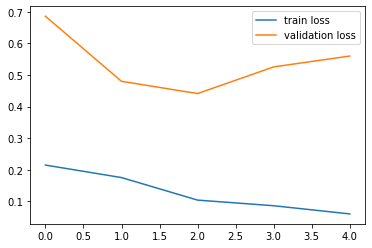

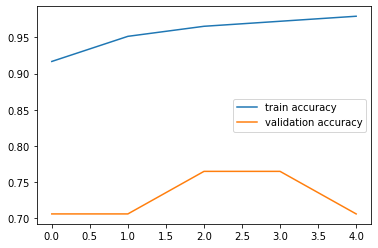

In [31]:
# plot the loss value
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**BUILDING A PREDICTIVE SYSTEM**

In [32]:
# Defining a sign detector function 

def sign_detector (sign_image):

    plt.figure(figsize=(10,5))
    # Taking Input from teh user
    test_image_path = input("Enter image path")
    test_image = Image.open(test_image_path)
    plt.imshow(test_image)
    # Resizing the image 
    test_image = test_image.resize((128,128))
    # Converting the image to RGB color 
    test_image = test_image.convert("RGB")
    # Converting to numpy array
    test_image = np.array(test_image)
    # Reshaping the image for one test sample 
    test_image = np.reshape(test_image, [1,128,128,3])
    # rescaling the image 
    test_image = test_image/255

    
    
    input_prediction = model.predict(test_image)

    print(input_prediction)


    input_pred_label = np.argmax(input_prediction)

    print(input_pred_label)


    if input_pred_label == 1:
        print('This is a Stop Sign. Stop Driving')
    else:
        print('This is not a stop Sign. Keep Driving ')

plt.show()


Enter image pathC://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop//40.jpg
1/1 [==============================] - 0s 109ms/step
[[0.00582523 0.98166996]]
1
This is a Stop Sign. Stop Driving


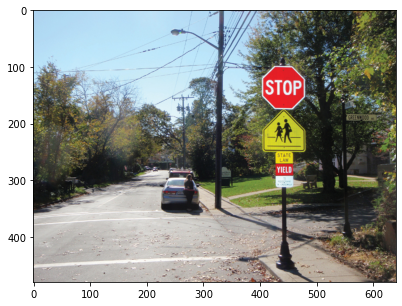

In [33]:
sign_detector(stop)

Enter image pathC://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//stop//36.jpg
1/1 [==============================] - 0s 16ms/step
[[0.04068338 0.9182846 ]]
1
This is a Stop Sign. Stop Driving


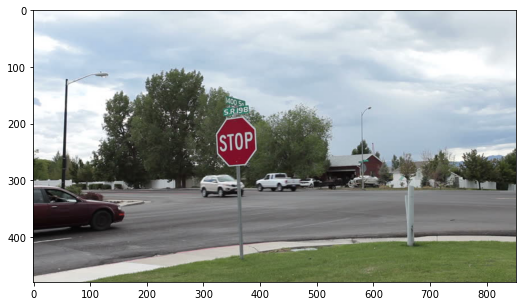

In [35]:
sign_detector(stop)

Enter image pathC://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//128.jpg
1/1 [==============================] - 0s 16ms/step
[[0.9171572 0.0954718]]
0
This is not a stop Sign. Keep Driving 


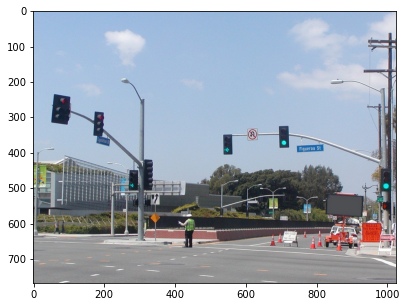

In [38]:
sign_detector(not_stop)

Enter image pathC://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//181.jpg
1/1 [==============================] - 0s 16ms/step
[[0.9228749  0.08520574]]
0
This is not a stop Sign. Keep Driving 


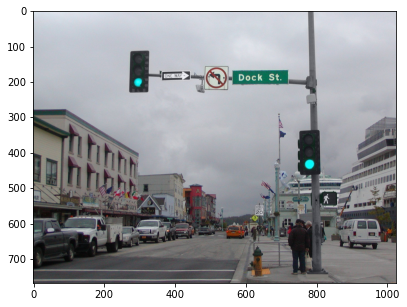

In [41]:
sign_detector(not_stop)

Enter image pathC://Users//Windows 10 Pro//Desktop//personal projects//PROJECT DATASETS//not_stop//110.jpg
1/1 [==============================] - 0s 16ms/step
[[0.9216314  0.08414813]]
0
This is not a stop Sign. Keep Driving 


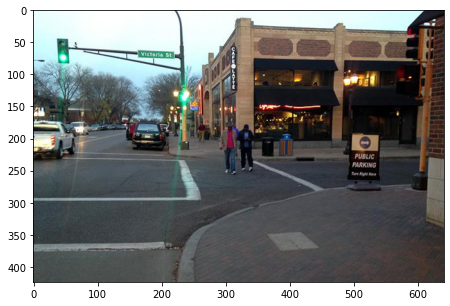

In [40]:
sign_detector(not_stop)

In [42]:
filename = "DL_MODEL_CNN_FOR_SELF_DRIVING_CARS_STOP_NOTSTOP_SGN_DETECTORS.save"

pickle.dump(model,open(filename,"wb"))

INFO:tensorflow:Assets written to: ram://fbb40d62-21aa-4319-b425-929adbc6133d/assets


INFO:tensorflow:Assets written to: ram://fbb40d62-21aa-4319-b425-929adbc6133d/assets


**Olatunde**  
**Thank You !**